# 7. wissenschaftliches Arbeiten mit Python

Python ist bestens zum wissenschaftlichen Arbeiten geeignet. Es können relativ einfach statistische Analysen und mathematische Berechnung durchgeführt werden, es ist jedoch auch möglich, Diagramm zu erzeugen.
In diesem Kapitel wollen wir uns kurz mit diesen beiden Themen befassen.

## 7.1 Die Module numpy, pandas und scipy

numpy ist ein open-source-Modul mit dem auch komplexe Daten (z.B. mehrdimensionale Felder, Arrays) strukturiert werden können. Darüber hinaus bietet numpy viele zusätzliche mathematischen Berechnungsmethoden an (lineare Algebra,..). numpy dient anderen Modulen oftmals als Grundlage (z.B. mit definierten Datenstrukturen)

Mit pandas können Daten einfach analysiert und bearbeitet werden. So können verschiedene Dateiformate mit pandas direkt eingeladen und analysiert werden.

In scipy werden verschiedene Module (z.B. numpy, pandas, matplotlib) zusammengefasst. Somit entsteht eine umfangreiche Sammlung von Methoden zum Analysieren von wissenschaftlichen Daten. 


Wir wollen uns nun ansehen, wie wir einige Aufgaben und Probleme, die wir im Bereich des wissenschaftlichen Arbeitens immer wieder haben, mit Python und den o.g. Modulen bearbeiten und lösen können. 

### 7.1.1 Import von Dateien

In Kapitel 5 haben wit schon einige Möglichkeiten gesehen, wie wir Daten aus Dateien in Python einlesen und dann weiterverarbeiten können. Dies kann jedoch mit o.g. Modulen noch deutlich komfortabler geschehen. Dies soll am Beispiel unserer DWD-Datei aus Kapitel 5 verdeutlicht werden:

In [62]:
import pandas as pd
dwd_data = pd.read_csv("DWD_Jahresniederschlag_Kiebingen.txt",sep=';',index_col=1, parse_dates=True)


Mit dem Befehl pandas(pd).read_csv() können wir nun direkt tabellenartige Datensätze einlesen. Wir müssen dabei nur den Dateiname, wie die Spalten getrennt sind (sep=";"), welche Spalte als Index verwendet werden soll und ob der Index (falls es sich um ein Datum/Uhrzeit handelt) direkt in an datetime-Objekt überführt (parsed) werden soll, eingeben. In unserer Datei ist die 2. Spalte (index_col=1) als Index definiert.
Abgespeichert werden die eingelesenen Daten in einem neuen Datentyp, der sich Datenrahmen (DataFrame) nennt. Über print() können wir den Datenrahmen ausgeben.Der Index steht dabei immer in der ersten Spalte.

In [63]:
print(dwd_data)

                   STATIONS_ID  MESS_DATUM_ENDE  QN_6  JA_NSH  JA_RR  JA_SH_S  \
MESS_DATUM_BEGINN                                                               
1980-01-01                4294         19801231     5      38  588.8      147   
1981-01-01                4294         19811231    10      83  668.0      433   
1982-01-01                4294         19821231    10      44  887.7      399   
1983-01-01                4294         19831231    10      30  576.8       92   
1984-01-01                4294         19841231    10      42  684.4      163   
1985-01-01                4294         19851231    10      59  612.8      532   
1986-01-01                4294         19861231    10      84  807.0      520   
1987-01-01                4294         19871231    10      47  747.7      285   
1988-01-01                4294         19881231    10      67  897.3      158   
1989-01-01                4294         19891231    10       0  652.0        0   
1990-01-01                42

Manchmal sind die Datensätze sehr umfangreich. Dann empfiehlt es sich, nur die ersten Reihen anzusehen:

In [64]:
print(dwd_data.head())

                   STATIONS_ID  MESS_DATUM_ENDE  QN_6  JA_NSH  JA_RR  JA_SH_S  \
MESS_DATUM_BEGINN                                                               
1980-01-01                4294         19801231     5      38  588.8      147   
1981-01-01                4294         19811231    10      83  668.0      433   
1982-01-01                4294         19821231    10      44  887.7      399   
1983-01-01                4294         19831231    10      30  576.8       92   
1984-01-01                4294         19841231    10      42  684.4      163   

                   JA_MX_RS  eor  
MESS_DATUM_BEGINN                 
1980-01-01             23.7  eor  
1981-01-01             36.0  eor  
1982-01-01             66.6  eor  
1983-01-01             31.1  eor  
1984-01-01             31.7  eor  




Falls wir nur eine Spalte bearbeiten wollen, können wir in eckigen Klammern die Spaltenüberschrift eingeben:

In [65]:
print(dwd_data[["JA_RR"]]) # Achtung: zwei eckige Klammern

                   JA_RR
MESS_DATUM_BEGINN       
1980-01-01         588.8
1981-01-01         668.0
1982-01-01         887.7
1983-01-01         576.8
1984-01-01         684.4
1985-01-01         612.8
1986-01-01         807.0
1987-01-01         747.7
1988-01-01         897.3
1989-01-01         652.0
1990-01-01         668.8
1991-01-01         471.3
1992-01-01         718.6
1993-01-01         816.0
1996-01-01         617.9
1997-01-01         602.8
1998-01-01         682.8
1999-01-01         843.2
2000-01-01         661.5
2001-01-01         819.6
2004-01-01         633.4
2005-01-01         680.7
2006-01-01         626.5
2007-01-01         718.6
2008-01-01         761.3
2009-01-01         724.7
2010-01-01         760.1
2011-01-01         668.4
2012-01-01         767.8
2013-01-01         803.5
2014-01-01         722.5
2015-01-01         497.1
2016-01-01         706.4
2017-01-01         668.9
2018-01-01         558.3
2019-01-01         702.3


Wir bekommen dann neben den Werten auch gleich noch den Index (in unserem Fall das Datum zu Messbeginn (Spalte2)).



Wir können uns auch 2 Spalten ansehen:

In [66]:
print(dwd_data[["JA_RR","QN_6"]])

                   JA_RR  QN_6
MESS_DATUM_BEGINN             
1980-01-01         588.8     5
1981-01-01         668.0    10
1982-01-01         887.7    10
1983-01-01         576.8    10
1984-01-01         684.4    10
1985-01-01         612.8    10
1986-01-01         807.0    10
1987-01-01         747.7    10
1988-01-01         897.3    10
1989-01-01         652.0    10
1990-01-01         668.8    10
1991-01-01         471.3     9
1992-01-01         718.6     9
1993-01-01         816.0     9
1996-01-01         617.9     9
1997-01-01         602.8     9
1998-01-01         682.8     9
1999-01-01         843.2     9
2000-01-01         661.5     9
2001-01-01         819.6     9
2004-01-01         633.4     9
2005-01-01         680.7     9
2006-01-01         626.5     9
2007-01-01         718.6     9
2008-01-01         761.3     9
2009-01-01         724.7     9
2010-01-01         760.1     9
2011-01-01         668.4     9
2012-01-01         767.8     9
2013-01-01         803.5     9
2014-01-

Manchmal bekommen wir Fehlermeldungen, dass die Spalte nicht exisitiert. Dann haben wir uns entweder verschrieben, oder aber wir haben evtl. Leerzeichen nicht gesehen. Ob in der Spaltenüberschrift Leerzeichen stehen, können wir folgendermaßen prüfen:

In [67]:
print(dwd_data.columns.tolist())

['STATIONS_ID', 'MESS_DATUM_ENDE', 'QN_6', 'JA_NSH', 'JA_RR', 'JA_SH_S', 'JA_MX_RS', 'eor']


Alles in Anführungszeichen gehört zu unseren Überschriften (im Notfall einfach Überschrift kopieren und dann in den Quellcode wieder einfügen.

Wir können nun auch die Daten nach bestimmten Zeiten filtern (z.B. nur die Daten zwischen den Jahren 2000 und 2020). Dazu nutzen wir die loc-Methode.

In [68]:
print(dwd_data.loc['2000-01-01':'2019-01-01'])

                   STATIONS_ID  MESS_DATUM_ENDE  QN_6  JA_NSH  JA_RR  JA_SH_S  \
MESS_DATUM_BEGINN                                                               
2000-01-01                4294         20001231     9       3  661.5        9   
2001-01-01                4294         20011231     9      18  819.6       27   
2004-01-01                4294         20041231     9      20  633.4       46   
2005-01-01                4294         20051231     9      50  680.7      311   
2006-01-01                4294         20061231     9      40  626.5      120   
2007-01-01                4294         20071231     9    -999  718.6     -999   
2008-01-01                4294         20081231     9    -999  761.3     -999   
2009-01-01                4294         20091231     9      23  724.7       77   
2010-01-01                4294         20101231     9     113  760.1      464   
2011-01-01                4294         20111231     9      14  668.4       53   
2012-01-01                42

Natürlich können wir auch nur eine Spalte für einen Zeitbereich ausgeben:

In [69]:
print(dwd_data[["JA_RR"]].loc['2000-01-01':'2010-01-01'])

                   JA_RR
MESS_DATUM_BEGINN       
2000-01-01         661.5
2001-01-01         819.6
2004-01-01         633.4
2005-01-01         680.7
2006-01-01         626.5
2007-01-01         718.6
2008-01-01         761.3
2009-01-01         724.7
2010-01-01         760.1


### 7.1.2 statistische Auswertungen

Über einen Datenrahmen können wir nun auch statistische Analysen durchführen. Dies kann z.B. über die describe-Methode des Datenrahmens erfolgen:

In [70]:
import pandas as pd
dwd_data = pd.read_csv("DWD_Jahresniederschlag_Kiebingen.txt",sep=';',index_col=1, parse_dates=True)
dwd_data[["JA_RR"]].describe()


,JA_RR
count,36.000000
mean,695.152778
std,99.027045
min,471.300000
25%,631.675000
50%,683.600000
75%,760.400000
max,897.300000


Wenn wir z.B. nur den Maximalwert haben wollen, können wir auch nur die max-Methode nutzen:

In [71]:
dwd_data[["JA_RR"]].max()


JA_RR    897.3
dtype: float64

Wir können die Statistik auch nach einer Klasseneinteilung berechnen lassen. In unseren Daten sehen wir z.B. die Spalte "QN_6" die uns Klassen für die Qualität der Daten angibt. Wir können nun z.B. die Statistik der Niederschläge ("JA_RR") für die einzelnen Qualtätsklassen ("QN_6") berechnen lassen:

In [72]:
dwd_data[["JA_RR","QN_6"]].groupby("QN_6").describe()

JA_RR                                                               
     count        mean         std    min      25%    50%      75%    max
QN_6                                                                     
3      1.0  702.300000         NaN  702.3  702.300  702.3  702.300  702.3
5      1.0  588.800000         NaN  588.8  588.800  588.8  588.800  588.8
9     24.0  688.829167   96.344696  471.3  631.675  694.6  760.400  843.2
10    10.0  720.250000  111.110118  576.8  656.000  676.6  792.175  897.3

Das Ergebnis lässt sich beispielhaft folgendermaßen beschreiben: 24 Werte haben eine Qualität (QN_6) von 9 (erste und zweite Spalte). Diese 24 Werte haben einen Mittelwert der Jahresniederschlagswerte von 688.8 mm 

### 7.1.3 Iterative Berechnungen

In Kapitel 3 haben wir in Aufgabe 3.6 versucht, den Wasserstand abzuschätzen, wenn 100 m³/s Wasser durch unser Gewässer fließen (Nach Manning-Strickler , siehe Aufgabe 2.1). Wir haben dabei gesehen, dass unser Ansatz zwar zielführend war, jedoch nicht sonderlich effizient (wir haben tausende von Berechungsschritten benötigt, um das Ergebnis zu erzielen). Dies war in unserem Fall nicht weiter von Bedeutung, da das Problem ja relativ überschaubar war. Wir wollen uns dennoch mal anschauen, wie man die Fragestellung auch lösen könnte.

Dazu müssen wir aber wissen, dass solche mathematischen Algorithmen immer nach einem Miminim (oder Maximum) suchen.
Unser ursprüngliches Problem lässt sich doch so zusammenfassen:

Bei welchem Wasserstand h ist mein damit berechneter Abfluss Q genau so groß wie ein gewünschter Abfluss (hier 100 m³/s).


Um mit numerischen Algorithmen rechnen zu können, müssen wir unsere Fragestellung so umstellen, dass ein Minimum gesucht wird. Dies kann dann folgendermaßen aussehen:

Bei welchem Wasserstand ist der Betrag der Differenz von berechnetem und gewünschtem Abfluss 0 ?

Dazu "klauen" wir uns zuerst wieder unsere Funktion zum Berechnen des Abflusses aus Aufgabe 4.1:

In [73]:
def q_manning_strickler(h):
    # Variablen mit Eingabedaten initialisieren (Dezimalzahlen !!!)
    b=10.0 # Gewässerbreite
    k_st=35.0 # Rauheitsbeiwert
    I=0.0015 # Sohlgefälle
    # Durchflossen Querschnittsfläche A, benetzer Umfang lu und hydraulischer Radius r_hy berechnen
    A = b*h
    l_u = b+2*h
    r_hy =A/l_u
    # Durchfluss Q nach Formel ausrechnen
    Q = k_st*r_hy**(2/3)*I**(1/2)*A
    # Durchfluss Q zurückgeben
    return Q


wir benötigen aber ja nicht diese Funktion, sondern wir wollen den Betrag der Differenz zu unserm gewünschten Abfluss. Also geben wir nicht Q zurück (nach dem return) sondern abs(Q-100.0).

In [74]:
def q_manning_strickler(h):
    # Variablen mit Eingabedaten initialisieren (Dezimalzahlen !!!)
    b=10.0 # Gewässerbreite
    k_st=35.0 # Rauheitsbeiwert
    I=0.0015 # Sohlgefälle
    # Durchflossen Querschnittsfläche A, benetzer Umfang lu und hydraulischer Radius r_hy berechnen
    A = b*h
    l_u = b+2*h
    r_hy =A/l_u
    # Durchfluss Q nach Formel ausrechnen
    Q = k_st*r_hy**(2/3)*I**(1/2)*A
    # Durchfluss Q zurückgeben
    return abs(Q-100) # Hier geben wir den Betrag der Differenz zu unserem gewünschten Wert ein



Jetzt müssen wir nur noch die Funktion in scipy aufrufen. Dazu müssen wir optimize von scipy importieren (erste Zeile) und danach die Funktion optimize.fmin() aufrufen. Diese Funktion benötigt die Funktion, die minimiert werden soll (bei uns q_manning_strickler) sowie einen ersten Schätzwert für h (hier 1.0). Ausgegeben wird unter anderem die Anzahl der Funktionsaufrufe und zurückgegeben wird der optimierte Wert für h.

In [75]:
from scipy import optimize

def q_manning_strickler(h):
    # Variablen mit Eingabedaten initialisieren (Dezimalzahlen !!!)
    b=10.0 # Gewässerbreite
    k_st=35.0 # Rauheitsbeiwert
    I=0.0015 # Sohlgefälle
    # Durchflossen Querschnittsfläche A, benetzer Umfang lu und hydraulischer Radius r_hy berechnen
    A = b*h
    l_u = b+2*h
    r_hy =A/l_u
    # Durchfluss Q nach Formel ausrechnen
    Q = k_st*r_hy**(2/3)*I**(1/2)*A
    # Durchfluss Q zurückgeben
    return abs(Q-100) # Hier geben wir den Betrag der Differenz zu unserem gewünschten Wert ein


minimum = optimize.fmin(q_manning_strickler, 1.0)
print(minimum)


Optimization terminated successfully.
         Current function value: 0.000166
         Iterations: 23
         Function evaluations: 46
[4.24056396]


Das Ergebnis zeigt, dass wir mit diesem Algorithmus nur 46 mal die Berechnungen durchführen müssen und der geschätzte Wasserstand 4.2406 ist. Natürlich kann man der Funktion fmin noch weitere Argumente übergeben (maximale Anzahl von Iterationen, Abbruchkriterium,....), das wollen wir hier aber nicht weiter vertiefen.

# 7.2 wissenschaftliche Abbildungen

In diesem Kapitel wollen wir uns kurz mit dem Thema Abbildungen beschäftigen. Dazu nutzen wir die matplotlib-Bibliothek. In Kapitel 4 haben wir uns ganz kurz schon einmal ein Beispiel dazu angesehen:

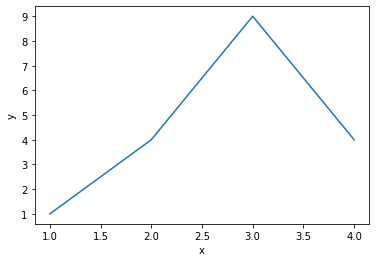

In [76]:
# %matplotlib inline muss nur verwendet werden, um die Abbildungen direkt im Notebook darzustellen
%matplotlib inline   

import matplotlib.pyplot as plt #importieren des Moduls (Untermoduls)

# x - und y - Daten als Listen nach er Funktion: als f(x)=x²
x_werte=[1,2,3,4]
y_werte=[1, 4, 9, 4]

plt.plot(x_werte,y_werte) #Abbildungsart (plot-Linientyp) und Daten definieren 

plt.xlabel('x') #Titel x-Achse
plt.ylabel('y') #Titel y-Achse
plt.show() #Plot darstellen

Damit können wir uns nun auch z.B. unsere Daten vom DWD schnell visualisieren :

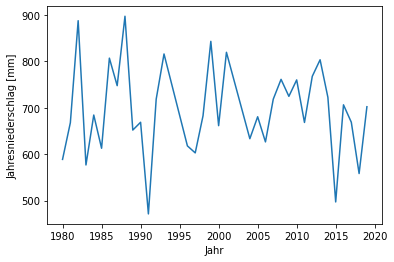

In [77]:
%matplotlib inline   
import matplotlib.pyplot as plt #importieren des Moduls (Untermoduls)
import pandas as pd

dwd_data = pd.read_csv("DWD_Jahresniederschlag_Kiebingen.txt",sep=';',index_col=1, parse_dates=True)
plt.plot(dwd_data[["JA_RR"]]) #Abbildungsart (plot-Linientyp) und Daten definieren 
plt.xlabel('Jahr') #Titel x-Achse
plt.ylabel('Jahresniederschlag [mm]') #Titel y-Achse
plt.show() #Plot darstellen



Wir können auch xy-Diagramme erzeugen. Z.B. wollen wir den Zusammenhang zwischen dem Jahresniederschlag (JA_RR) und dem maximalen Tagesniederschlag (JA_MX_RS) im gleichen Jahr analysieren: 

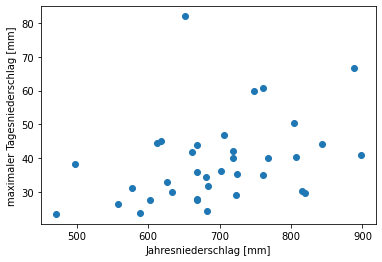

In [78]:
%matplotlib inline   
import matplotlib.pyplot as plt #importieren des Moduls (Untermoduls)
import pandas as pd

dwd_data = pd.read_csv("DWD_Jahresniederschlag_Kiebingen.txt",sep=';',index_col=1, parse_dates=True)
plt.scatter(dwd_data[["JA_RR"]],dwd_data[["JA_MX_RS"]]) #Abbildungsart (plot-Linientyp) und Daten definieren 
plt.xlabel('Jahresniederschlag [mm]') #Titel x-Achse
plt.ylabel('maximaler Tagesniederschlag [mm]') #Titel y-Achse
plt.show() #Plot darstellen

Natürlich können wir Achsenskalierungen und auch Farben und Symbole anpassen. Dies wollen wir hier aber nicht näher ausführen, vielmehr sollen Sie mit den folgenden Beispielen einen Eindruch bekommen, was grundsätzlich mit matplotlib möglich ist (mit einem gewissen Aufwand). Alle folgenden Beispiele stammen von https://matplotlib.org/3.1.1/gallery/index.html 

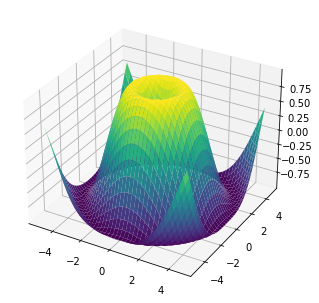

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

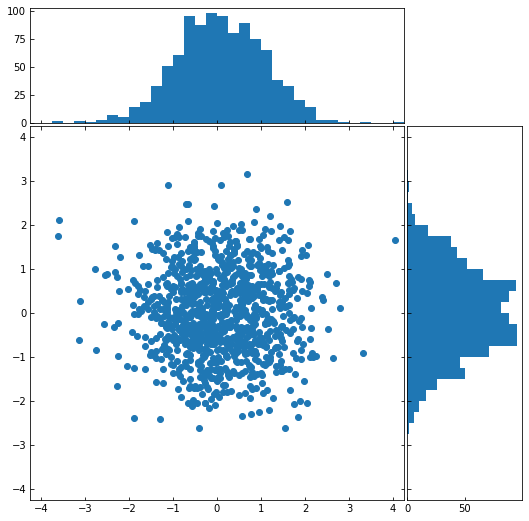

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

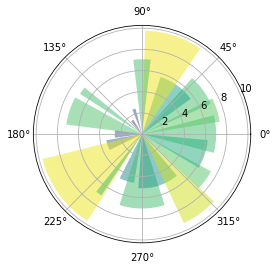

In [81]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

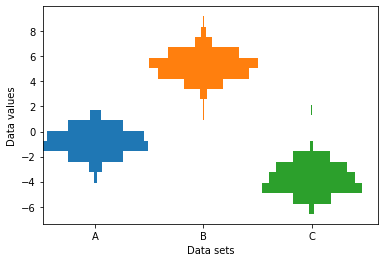

In [82]:
%matplotlib inline   

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)
number_of_bins = 20

# An example of three data sets to compare
number_of_data_points = 387
labels = ["A", "B", "C"]
data_sets = [np.random.normal(0, 1, number_of_data_points),
             np.random.normal(6, 1, number_of_data_points),
             np.random.normal(-3, 1, number_of_data_points)]

# Computed quantities to aid plotting
hist_range = (np.min(data_sets), np.max(data_sets))
binned_data_sets = [
    np.histogram(d, range=hist_range, bins=number_of_bins)[0]
    for d in data_sets
]
binned_maximums = np.max(binned_data_sets, axis=1)
x_locations = np.arange(0, sum(binned_maximums), np.max(binned_maximums))

# The bin_edges are the same for all of the histograms
bin_edges = np.linspace(hist_range[0], hist_range[1], number_of_bins + 1)
centers = 0.5 * (bin_edges + np.roll(bin_edges, 1))[:-1]
heights = np.diff(bin_edges)

# Cycle through and plot each histogram
fig, ax = plt.subplots()
for x_loc, binned_data in zip(x_locations, binned_data_sets):
    lefts = x_loc - 0.5 * binned_data
    ax.barh(centers, binned_data, height=heights, left=lefts)

ax.set_xticks(x_locations)
ax.set_xticklabels(labels)

ax.set_ylabel("Data values")
ax.set_xlabel("Data sets")

plt.show()

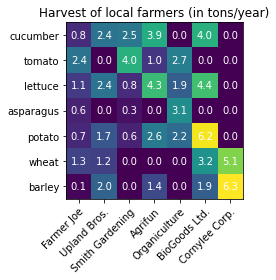

In [83]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()